Enter number of processes 

Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time [0, 0]
[2, 1]
[4, 2]
[6, 3]
[8, 4]
11100000000000000000
00011111100000000000
00000000011110000000
00000000000001111100
00000000000000000011
A   0    3   3     3      0
B   2    6   9     7      1
C   4    4   13     9      5
D   6    5   18     12      7
E   8    2   20     12      10
Avg of TAT  8.6
Avg of WT  4.6


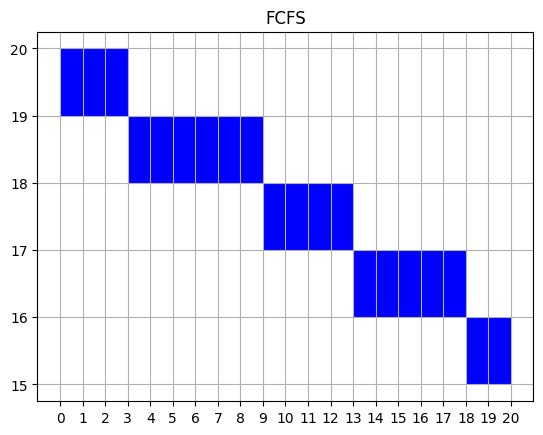

In [4]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def solve():
    print("Enter number of processes ", end='')
    process = int(input())

    arrival = []
    burst = []
    procompleted = [0] * process
    finish = []

    p = [] # priority queue arrival number
    
    for i in range(process):
        print("Enter arrival time ", end='')
        arrival.append(int(input()))
        print("Enter burst time ", end='')
        burst.append(int(input()))
        heapq.heappush(p, [arrival[i], i])

    completed = 0


    v = [] * process # Answer

    time = 0
    while True:
        if p[0][1] <= time:
            running_process = heapq.heappop(p)
            print(running_process)
            total = burst[running_process[1]] + time
            # print(running_process[0] , " " , running_process[1] , " " , running_process[2])
            while time < total:
                temp = []
                for i in range(process):
                    if i == running_process[1]:
                        temp.append(1)
                    else:
                        temp.append(0)
                v.append(temp)
                time += 1
            completed += 1
            if completed == process:
                break
            time -= 1
        else:
            temp = []
            for i in range(process):
                # print(i)
                temp.append(0)
            v.append(temp)
        time += 1
                 
    # print(v)
    
    for i in range(process):
        last_ind = 0
        for j in range(len(v)):
            print(v[j][i], end='')
            if v[j][i] == 1:
                last_ind = j
        finish.append(last_ind + 1)
        print()
        
    matrix_vec = np.array(v)
    
    nonzero = np.argwhere(matrix_vec == 1)
    
    for i, j in nonzero:
        plt.fill([i, i + 1, i + 1, i], [len(matrix_vec) - j - 1, len(matrix_vec) - j - 1, len(matrix_vec) - j, len(matrix_vec) - j], 'blue')
    
        
    name = 'A'
    avg_wt = 0
    avg_tat = 0
    max_yticks = 0
    for i in range(process):
        print(chr(ord(name) + i), " ", arrival[i], "  ", burst[i], " ", finish[i], "   ", finish[i] - arrival[i], "    ", finish[i] - arrival[i] - burst[i])
        max_yticks = max(max_yticks, finish[i])
        avg_wt += finish[i] - arrival[i] - burst[i]
        avg_tat += finish[i] - arrival[i]

    print("Avg of TAT ", avg_tat / process)
    print("Avg of WT ", avg_wt / process)
    
    plt.xticks(range(max_yticks + 1))
    plt.grid(True)
    plt.title('FCFS')
    plt.show()

if __name__ == "__main__":
    n = 1
    # n = int(input())
    while n > 0:
        solve()
        n -= 1

Enter number of processes Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time 11100000000000000000
00010000000000011111
00001111000000000000
00000000001111100000
00000000110000000000
A   0    3   3     3      0
B   2    6   20     18      12
C   4    4   8     4      0
D   6    5   15     9      4
E   8    2   10     2      0
Avg of TAT  7.2
Avg of WT  3.2


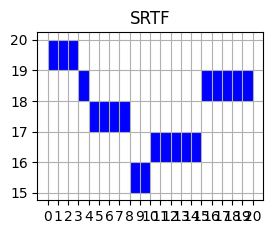

In [5]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def solve():
    print("Enter number of processes ", end='')
    process = int(input())

    arrival = []
    burst = []
    procompleted = [0] * process
    finish = []

    for i in range(process):
        print("Enter arrival time ", end='')
        arrival.append(int(input()))
        print("Enter burst time ", end='')
        burst.append(int(input()))

    completed = 0

    p = [] # priority queue Burst completed arrival number

    v = [] # Answer

    time = 0
    while True:
        for i in range(process):
            if arrival[i] <= time and procompleted[i] == 0:
                heapq.heappush(p, [burst[i], 0, arrival[i], i])
                # print(i)
                procompleted[i] = 1
        if len(p):
            running_process = heapq.heappop(p)
            temp = []
            for i in range(process):
                if i == running_process[3]:
                    temp.append(1)
                else:
                    temp.append(0)
            v.append(temp)
            running_process[0] -= 1
            running_process[1] = 1
            if running_process[0]:
                heapq.heappush(p, running_process)
            else:
                completed += 1
            for i in p:
                i[2] = 1
            if completed == process:
                break
        else:
            temp = []
            for i in range(process):
                # print(i)
                temp.append(0)
            v.append(temp)
        time += 1
    
    for i in range(process):
        last_ind = 0
        for j in range(len(v)):
            print(v[j][i], end='')
            if v[j][i] == 1:
                last_ind = j
        finish.append(last_ind + 1)
        print()
        
    matrix_vec = np.array(v)
    
    nonzero = np.argwhere(matrix_vec == 1)
    plt.subplot(2,2,1)
    
    for i, j in nonzero:
        plt.fill([i, i + 1, i + 1, i], [len(matrix_vec) - j - 1, len(matrix_vec) - j - 1, len(matrix_vec) - j, len(matrix_vec) - j], 'blue')
    
        
    name = 'A'
    avg_wt = 0
    avg_tat = 0
    max_yticks = 0
    for i in range(process):
        print(chr(ord(name) + i), " ", arrival[i], "  ", burst[i], " ", finish[i], "   ", finish[i] - arrival[i], "    ", finish[i] - arrival[i] - burst[i])
        max_yticks = max(max_yticks, finish[i])
        avg_wt += finish[i] - arrival[i] - burst[i]
        avg_tat += finish[i] - arrival[i]

    print("Avg of TAT ", avg_tat / process)
    print("Avg of WT ", avg_wt / process)
    
    plt.xticks(range(max_yticks + 1))
    plt.grid(True)
    plt.title('SRTF')
    plt.show()

if __name__ == "__main__":
    n = 1
    while n > 0:
        solve()
        n -= 1


Enter number of processes Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time Enter arrival time Enter burst time 11100000000000000000
00011111100000000000
00000000000111100000
00000000000000011111
00000000011000000000
A   0    3   3     3      0
B   2    6   9     7      1
C   4    4   15     11      7
D   6    5   20     14      9
E   8    2   11     3      1
Avg of TAT  7.6
Avg of WT  3.6


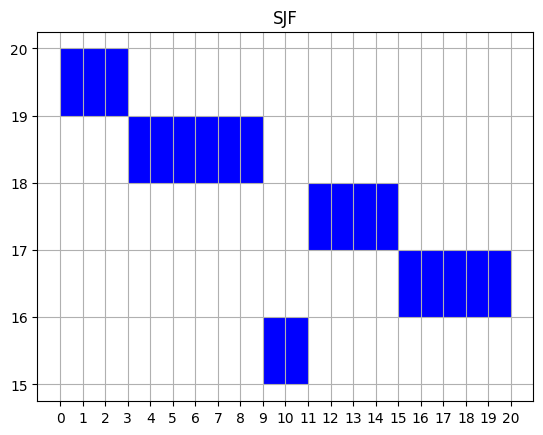

In [6]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def solve():
    print("Enter number of processes ", end='')
    process = int(input())

    arrival = []
    burst = []
    procompleted = [0] * process
    finish = []

    for i in range(process):
        print("Enter arrival time ", end='')
        arrival.append(int(input()))
        print("Enter burst time ", end='')
        burst.append(int(input()))

    completed = 0

    p = [] # priority queue Burst completed arrival number

    v = [] # Answer

    time = 0
    while True:
        for i in range(process):
            if arrival[i] <= time and procompleted[i] == 0:
                heapq.heappush(p, [burst[i], arrival[i], i])
                # print(i)
                procompleted[i] = 1
        if len(p):
            running_process = heapq.heappop(p)
            total = running_process[0] + time
            while time < total:
                temp = []
                for i in range(process):
                    if i == running_process[2]:
                        temp.append(1)
                    else:
                        temp.append(0)
                v.append(temp)
                if arrival[i] <= time and procompleted[i] == 0:
                    heapq.heappush(p, [burst[i], arrival[i], i])
                    procompleted[i] = 1
                time += 1
            completed += 1
            if completed == process:
                break
            time -= 1
        else:
            temp = []
            for i in range(process):
                # print(i)
                temp.append(0)
            v.append(temp)
        time += 1
    
    for i in range(process):
        last_ind = 0
        for j in range(len(v)):
            print(v[j][i], end='')
            if v[j][i] == 1:
                last_ind = j
        finish.append(last_ind + 1)
        print()
        
    matrix_vec = np.array(v)
    
    nonzero = np.argwhere(matrix_vec == 1)
    
    for i, j in nonzero:
        plt.fill([i, i + 1, i + 1, i], [len(matrix_vec) - j - 1, len(matrix_vec) - j - 1, len(matrix_vec) - j, len(matrix_vec) - j], 'blue')
    
        
    name = 'A'
    avg_wt = 0
    avg_tat = 0
    max_yticks = 0
    for i in range(process):
        print(chr(ord(name) + i), " ", arrival[i], "  ", burst[i], " ", finish[i], "   ", finish[i] - arrival[i], "    ", finish[i] - arrival[i] - burst[i])
        max_yticks = max(max_yticks, finish[i])
        avg_wt += finish[i] - arrival[i] - burst[i]
        avg_tat += finish[i] - arrival[i]

    print("Avg of TAT ", avg_tat / process)
    print("Avg of WT ", avg_wt / process)
    
    plt.xticks(range(max_yticks + 1))
    plt.grid(True)
    plt.title('SJF')
    plt.show()

if __name__ == "__main__":
    n = 1
    while n > 0:
        solve()
        n -= 1

Enter number of processes Enter arrival time Enter burst time Enter priority Enter arrival time Enter burst time Enter priority Enter arrival time Enter burst time Enter priority Enter arrival time Enter burst time Enter priority Enter arrival time Enter burst time Enter priority A   0    3   18     18      15
B   2    6   12     10      4
C   4    4   8     4      0
D   6    5   17     11      6
E   8    2   20     12      10
Avg of TAT  11.0
Avg of WT  7.0


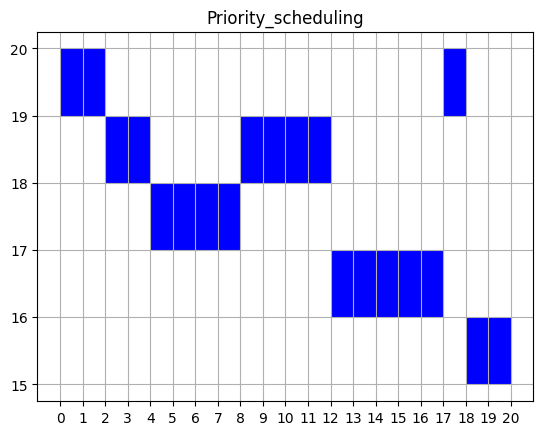

In [9]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def solve():
    print("Enter number of processes ", end='')
    process = int(input())

    arrival = []
    burst = []
    procompleted = [0] * process
    finish = []
    priority = []

    for i in range(process):
        print("Enter arrival time ", end='')
        arrival.append(int(input()))
        print("Enter burst time ", end='')
        burst.append(int(input()))
        print("Enter priority ", end='')
        priority.append(int(input()))

    completed = 0

    p = [] # priority queue priority Burst number

    v = [] * process # Answer

    time = 0
    while True:
        for i in range(process):
            if arrival[i] <= time and procompleted[i] == 0:
                heapq.heappush(p, [priority[i], burst[i], i])
                procompleted[i] = 1
        if len(p):
            runnn = heapq.heappop(p)
            # print(runnn)
            # print(runnn[0] , " " , runnn[1] , " " , runnn[2])
            temp = []
            for i in range(process):
                if i == runnn[2]:
                    temp.append(1)
                else:
                    temp.append(0)
            v.append(temp)
            runnn[1] -= 1
            if runnn[1] == 0:
                completed += 1
            else:
                heapq.heappush(p, runnn)
            if completed == process:
                break
        else:
            temp = []
            for i in range(process):
                # print(i)
                temp.append(0)
            v.append(temp)
        time += 1
                 
    # print(v)
    
    for i in range(process):
        last_ind = 0
        for j in range(len(v)):
            # print(v[j][i], end='')
            if v[j][i] == 1:
                last_ind = j
        finish.append(last_ind + 1)
        # print()
        
    matrix_vec = np.array(v)
    
    nonzero = np.argwhere(matrix_vec == 1)
    
    for i, j in nonzero:
        plt.fill([i, i + 1, i + 1, i], [len(matrix_vec) - j - 1, len(matrix_vec) - j - 1, len(matrix_vec) - j, len(matrix_vec) - j], 'blue')
    
        
    name = 'A'
    avg_wt = 0
    avg_tat = 0
    max_yticks = 0
    for i in range(process):
        print(chr(ord(name) + i), " ", arrival[i], "  ", burst[i], " ", finish[i], "   ", finish[i] - arrival[i], "    ", finish[i] - arrival[i] - burst[i])
        max_yticks = max(max_yticks, finish[i])
        avg_wt += finish[i] - arrival[i] - burst[i]
        avg_tat += finish[i] - arrival[i]

    print("Avg of TAT ", avg_tat / process)
    print("Avg of WT ", avg_wt / process)
    
    plt.xticks(range(max_yticks + 1))
    plt.grid(True)
    plt.title('Priority_scheduling')
    plt.show()

if __name__ == "__main__":
    n = 1
    # n = int(input())
    while n > 0:
        solve()
        n -= 1

